In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./NBA Data/data/shot log GSW.csv')

In [3]:
df.head()

,self previous shot,player position,home game,location x,opponent previous shot,home team,shot type,points,away team,location y,time,date,shoot player,time from last shot,quarter,current shot outcome
0,NaN,PF,Yes,244.0,MISSED,GSW,Jump Shot,3,SAS,92.0,0:39,2016-10-25,Draymond Green,NaN,1,MISSED
1,MISSED,SF,Yes,197.0,SCORED,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,2016-10-25,Kevin Durant,26.0,1,SCORED
2,SCORED,SG,Yes,74.0,SCORED,GSW,Running Reverse Layup,2,SAS,251.0,1:40,2016-10-25,Klay Thompson,35.0,1,MISSED
3,MISSED,PF,Yes,54.0,MISSED,GSW,Cutting Layup Shot,2,SAS,231.0,2:32,2016-10-25,Draymond Green,52.0,1,MISSED
4,MISSED,PG,Yes,308.0,MISSED,GSW,Jump Shot,3,SAS,380.0,2:58,2016-10-25,Stephen Curry,26.0,1,MISSED


In [4]:
df = df.drop(['self previous shot', 'opponent previous shot', 'time from last shot'], axis = 1)

In [5]:
df = df.rename(columns={'current shot outcome':'outcome','location x':'loc_x','location y':'loc_y','shoot player':'shooter','home game':'home'})

In [6]:
df.head()

,player position,home,loc_x,home team,shot type,points,away team,loc_y,time,date,shooter,quarter,outcome
0,PF,Yes,244.0,GSW,Jump Shot,3,SAS,92.0,0:39,2016-10-25,Draymond Green,1,MISSED
1,SF,Yes,197.0,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,2016-10-25,Kevin Durant,1,SCORED
2,SG,Yes,74.0,GSW,Running Reverse Layup,2,SAS,251.0,1:40,2016-10-25,Klay Thompson,1,MISSED
3,PF,Yes,54.0,GSW,Cutting Layup Shot,2,SAS,231.0,2:32,2016-10-25,Draymond Green,1,MISSED
4,PG,Yes,308.0,GSW,Jump Shot,3,SAS,380.0,2:58,2016-10-25,Stephen Curry,1,MISSED


In [7]:
df['outcome'] = df.outcome.replace('BLOCKED','MISSED')

In [10]:
# df = df[df.date == '2016-10-25']

In [21]:
df = df[df['home game'] == 'Yes']

In [22]:
df1 = df[df.quarter == 1]
df2 = df[df.quarter == 2]
df3 = df[df.quarter == 3]
df4 = df[df.quarter == 4]

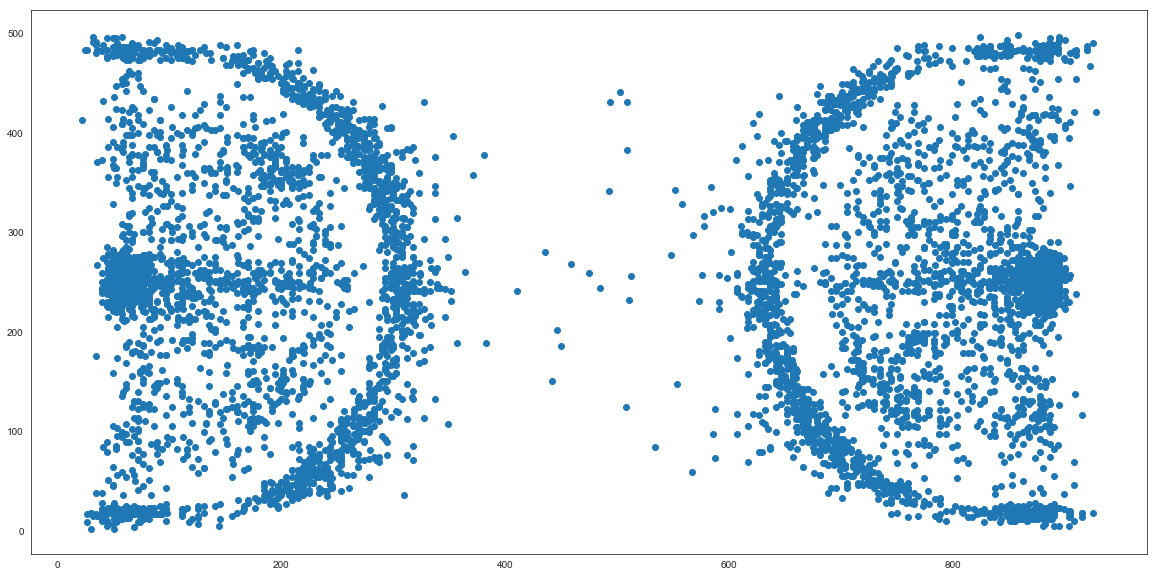

In [60]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(20,10))
plt.scatter(df['loc_x'], df['loc_y'])
plt.show()

In [9]:
df.loc_x.max(), df.loc_y.max()

(928.0, 498.0)

In [10]:
df.loc_x.min(), df.loc_y.min()

(22.0, 2.0)

In [11]:
width = df.loc_x.max() -  df.loc_x.min()
height = df.loc_y.max() - df.loc_y.min()
width, height, width/2

(906.0, 496.0, 453.0)

In [12]:
df.loc_x.mode(), df.loc_y.mode()

(0    888.0
 dtype: float64, 0    250.0
 dtype: float64)

In [64]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
     
    backboard1 = Rectangle((50, 225), -1, 50, linewidth=lw, color=color)
    backboard2 = Rectangle((895, 225), 1, 50, linewidth=lw, color=color)
    
    hoop1 = Circle((60, 250), radius=6, linewidth=lw, color=color, fill=False)
    hoop2 = Circle((885, 250), radius=6, linewidth=lw, color=color, fill=False)
    
    restricted1 = Arc((50, 250), 80, 80, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    restricted2 = Arc((895, 250), 80, 80, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    freethrow1_outer = Arc((195, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    freethrow2_outer = Arc((755, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)
    
    freethrow1_inner = Arc((195, 250), 100, 120, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color, linestyle='dashed')
    
    freethrow2_inner = Arc((755, 250), 100, 120, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color, linestyle='dashed')
    
    threepoint1 = Arc((90, 250), 450, 400, angle=270, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
    threepoint2 = Arc((850, 250), 450, 400, angle=270, theta1=180, theta2=0, linewidth=lw,
                     color=color)    
    
    innerbox1 = Rectangle((20, 200), 175, 100, linewidth=lw, color=color,
                          fill=False)
    
    innerbox2 = Rectangle((930, 200), -175, 100, linewidth=lw, color=color,
                          fill=False)
    
    outbox1 = Rectangle((20, 190), 175, 120, linewidth=lw, color=color,
                          fill=False)
    
    outbox2 = Rectangle((930, 190), -175, 120, linewidth=lw, color=color,
                          fill=False)
    
    half_court_line = Rectangle((470, 0), 1, 500, linewidth=lw, color=color,
                          fill=False)
    
    half_court_circle  = Circle((470, 250), radius=60, linewidth=lw, color=color, fill=False)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [backboard1, backboard2, hoop1, hoop2, restricted1,
                      restricted2, threepoint1, threepoint2, innerbox1,
                      innerbox2, freethrow1_outer, freethrow2_outer,
                      outbox1, outbox2, freethrow1_inner, freethrow2_inner,
                      half_court_line, half_court_circle]
    
    if outer_lines:
    # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((20, 0), 910, 500, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
    
      # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    ax.set_aspect('auto')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')
    
    return ax


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


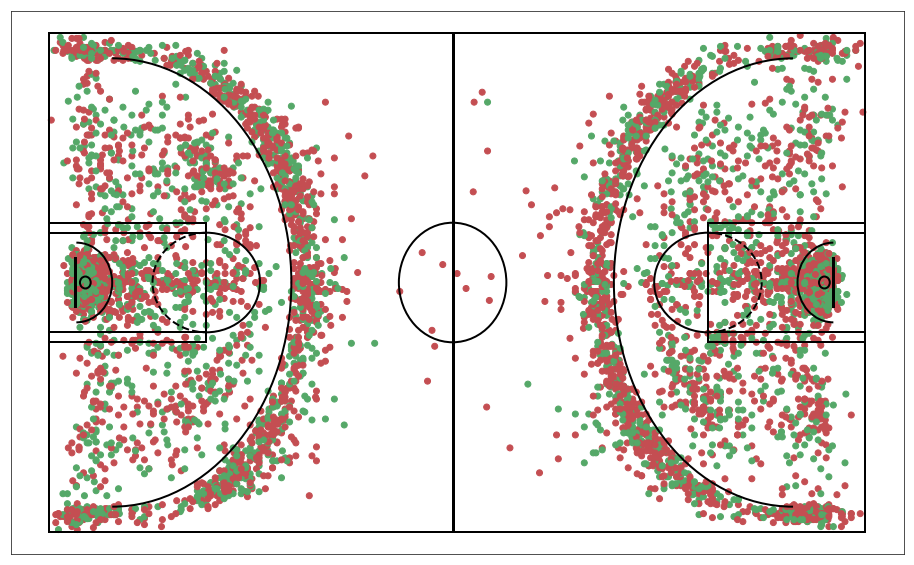

In [65]:
plt.figure(figsize=(16,10))
colors = np.where(df["outcome"]=='SCORED','g','r')
plt.scatter(df['loc_x'], df['loc_y'], c=colors, alp)
draw_court(outer_lines=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


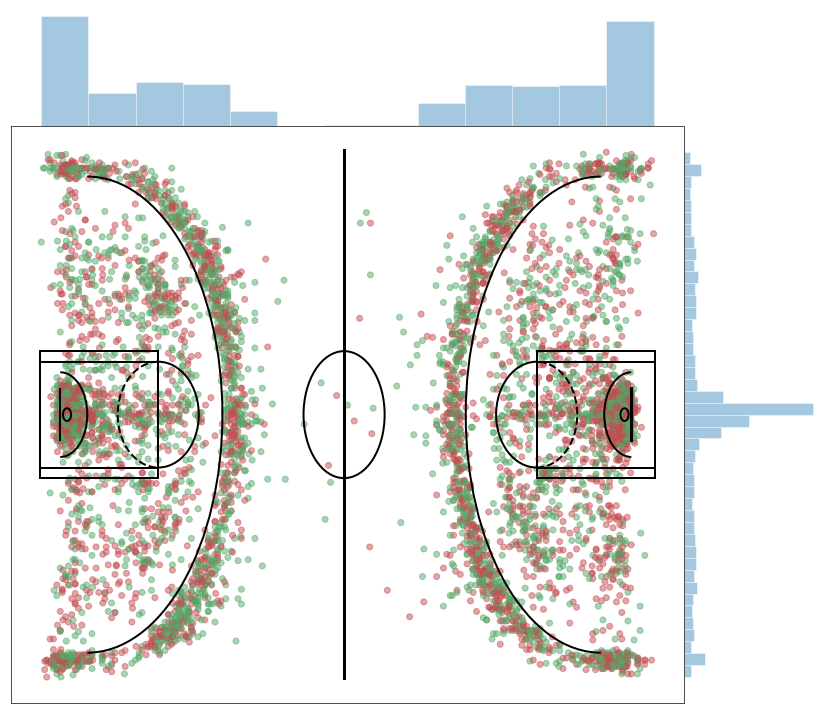

In [28]:
# create our jointplot
joint_shot_chart = sns.jointplot(df.loc_x, df.loc_y, stat_func=None,
                                 kind='scatter', space=0, alpha=0.5, joint_kws={"color":colors})

joint_shot_chart.fig.set_size_inches(13,11)

ax = joint_shot_chart.ax_joint

draw_court(ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')